In [20]:
# Loading functions for calculating Ezh2 binding in mouse RRBS samples and plotting Figs 3b,c 4b,c.

data='../data/'
# data/chip contains chip-seq data
# data/meth/r contains DNA methylation RRBS data 
# data/meth/r/cr contains DNA methylation RRBS from mouse CR study
# data/meth/l contains mouse liver single cell DNAm data

import pandas as pd
import pyBigWig 
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
#from statannot import add_stat_annotation

mez1=pyBigWig.open(data+'chip/SRX2528911.bw') # Mouse ESC (E14) Ezh2 chip

# Extract dataframe of methylation for each tissue type in RRBS dataset
def get_df(tissue,path,y,o):
    cells=y+o
    print(len(y),len(o),end=': ')
    path=data+'meth/r/'+path+'/'
    dfs=[]
    for f in cells:
        print(f,end=',')
        df=pd.read_csv(path+f+'.csv',sep=',',engine='c',index_col=0)#,header=None,usecols=[0,2,3])
        #df.columns=['ch','b',cell]
        #df[cell]=df[cell]/100
        dfs.append(df)    
    return dfs,y,o

#Create dataframe with average methylation and Ezh2 binding per LMR
def prc(dfs):
    df=dfs[0].merge(dfs[1],left_index=True,right_index=True)#['ch','b'],right_on=['ch','b'])
    for i in range(2,len(dfs)):
        print(i,end=',')
        df=df.merge(dfs[i],left_index=True,right_index=True)
    len(df)    
    df['m']=df.mean(1)
    df=df[df['m']<.2].copy()
    df['ch']='chr'+df.index.str.split('_').str[0]
    df['b']=df.index.str.split('_').str[1].astype(int)
    df['ez1']=df.apply(lambda x: mez1.stats(x['ch'],x['b'],x['b']+1)[0],axis=1)
    df=df.sort_values('ez1').reset_index()
    return df

In [5]:
#loading mouse RRBS dataset and phenodata
rrbs='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE120nnn/mean/matrix/GSE120137-GPL21103_series_matrix.txt.gz'
rrbs='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE120nnn/GSE120137/matrix/GSE120137-GPL21103_series_matrix.txt.gz'
age=pd.read_table(rrbs,skiprows=31).T
age=age.drop('!Sample_title')
age['age']=age[10].str[5:].str[:-2].astype(float)
age['id']=age.index.str[-3:]
age['age']=age['age'].astype(int).astype(str)+' months'
age=age[age['id']!='012']

In [12]:
%%time

#looping through each tissue and calculating Ezh2 binding per LMR and writing them out as csv files
tissues=['Adipose','Blood','Kidney','Liver','Lung','Muscle']
paths=['a','b','k','l','u','m']
for i in range(len(tissues)):
    tissue=tissues[i]
    print(tissue)
    path=paths[i]
    y=age[(age[6]==tissue)&(age['age']=='2 months')].id.tolist()#[:1]
    o=age[(age[6]==tissue)&(age['age']=='20 months')].id.tolist()#[:1]
    dic={}
    for oi in o: dic[oi]='o'
    for yi in y: dic[yi]='y'
    dfs,y,o=get_df(tissue, path,y,o)
    df=prc(dfs)
    pl=df.dropna()[y+o].rolling(20000).mean() # rolling average every 20000 bases
    pl.to_csv(data+'meth/r/'+tissue+'.csv')
    print()

Adipose
16 19: 041,042,043,044,045,046,047,048,049,050,051,052,053,054,055,056,001,002,003,004,005,006,007,008,009,010,011,013,014,015,016,017,018,019,020,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,
Blood
16 16: 041,045,056,057,058,059,081,082,083,084,085,086,087,088,089,090,001,005,006,007,008,009,010,011,013,014,015,016,017,018,019,020,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,
Kidney
15 19: 041,042,043,044,045,046,047,048,049,050,051,053,054,055,056,001,002,003,004,005,006,007,008,009,010,011,013,014,015,016,017,018,019,020,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,
Liver
20 19: 041,042,043,044,045,046,047,048,049,050,051,052,053,054,055,056,057,058,059,060,001,002,003,004,005,006,007,008,009,010,011,013,014,015,016,017,018,019,020,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,
Lung
17 19: 042,0

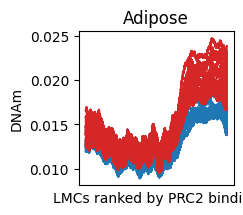

/local/scratch/moqri/slrmtmp.43007249/ipykernel_18769/1744254281.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(data=pl[['m','age']],y='m',x='age', palette=['tab:blue','tab:red'])


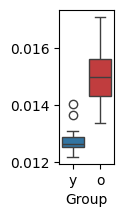

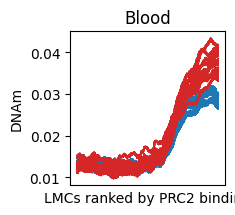

/local/scratch/moqri/slrmtmp.43007249/ipykernel_18769/1744254281.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(data=pl[['m','age']],y='m',x='age', palette=['tab:blue','tab:red'])


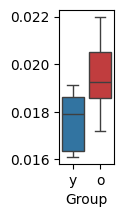

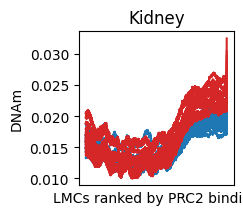

/local/scratch/moqri/slrmtmp.43007249/ipykernel_18769/1744254281.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(data=pl[['m','age']],y='m',x='age', palette=['tab:blue','tab:red'])


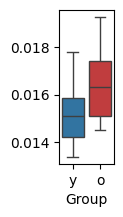

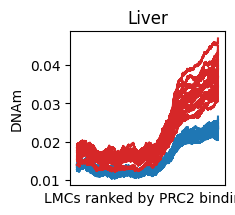

/local/scratch/moqri/slrmtmp.43007249/ipykernel_18769/1744254281.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(data=pl[['m','age']],y='m',x='age', palette=['tab:blue','tab:red'])


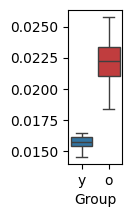

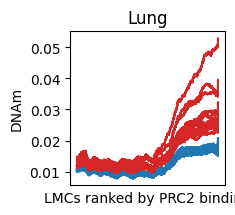

/local/scratch/moqri/slrmtmp.43007249/ipykernel_18769/1744254281.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(data=pl[['m','age']],y='m',x='age', palette=['tab:blue','tab:red'])


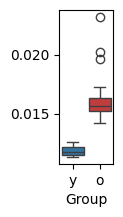

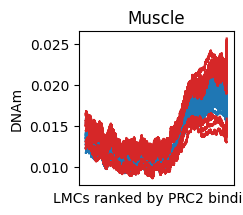

/local/scratch/moqri/slrmtmp.43007249/ipykernel_18769/1744254281.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(data=pl[['m','age']],y='m',x='age', palette=['tab:blue','tab:red'])


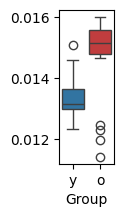

In [16]:
# Fig 3b - plotting by tissue, mouse RRBS PRC2-AgeIndex plots (mean methylation of LMRs ranked by Ezh2 binding)
tissues=['Adipose','Blood','Kidney','Liver','Lung','Muscle']
for tissue in tissues:
    y=age[(age[6]==tissue)&(age['age']=='2 months')].id.tolist()#[:1]
    o=age[(age[6]==tissue)&(age['age']=='20 months')].id.tolist()#[:1]    
    dic={}
    for oi in o: dic[oi]='o'
    for yi in y: dic[yi]='y'    
    pl=pd.read_csv(data+'meth/r/'+tissue+'.csv',index_col=0)
    ax=pl.plot(color=len(y)*['tab:blue']+len(o)*['tab:red'],figsize=(2,2))
    ax.get_legend().remove()
    ax.set_xticks([])
    ax.set_xlabel('LMCs ranked by PRC2 binding', fontsize=10)
    ax.set(ylabel='DNAm',title=tissue);   
    ax.get_figure().savefig('figures/'+'rrbs_'+tissue+'.png', dpi=600,bbox_inches='tight')
    plt.show()
    pl=pl.T
    pl['m']=pl.mean(1)
    pl['age']=pl.apply(lambda x: dic[x.name] if x.name in dic.keys() else np.nan,axis=1)
    fig, ax = plt.subplots(figsize=(.7,2));
    ax=sns.boxplot(data=pl[['m','age']],y='m',x='age', palette=['tab:blue','tab:red'])
    ax.set(ylabel='',xlabel='Group')
    #add_stat_annotation(ax, data=pl, x='m', y='age',box_pairs=[(("y", "o"))],test='t-test_ind', loc='inside',verbose=0);
    fig.savefig('figures/'+'rrbs_'+tissue+'_prc'+'.png', dpi=600,bbox_inches='tight')
    plt.show()

In [17]:
# The following steps process the scWGBS mouse liver dataset SRP069120 for Fig 3c
m=pd.read_csv('results/mm10_top_PRC2_d100.csv') 
m['r']=m.apply(lambda x: set(range(x['b'],x['e'])),axis=1)
mg=m.groupby('ch')['r'].apply(list)
mg=mg.apply(lambda x:set.union(*x)) 

In [19]:
%%time
tissue='Liver'
path='l'
y=age[(age[6]==tissue)&(age['age']=='2 months')].id.tolist()#[:1]
o=age[(age[6]==tissue)&(age['age']=='20 months')].id.tolist()#[:1]
dfs,y,o=get_df(tissue, path, y,o)
df=prc(dfs)

20 19: 041,042,043,044,045,046,047,048,049,050,051,052,053,054,055,056,057,058,059,060,001,002,003,004,005,006,007,008,009,010,011,013,014,015,016,017,018,019,020,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,CPU times: user 1min 43s, sys: 5.92 s, total: 1min 49s
Wall time: 1min 52s


In [24]:
df.index=df['index']
ref=df.copy()
ref['pr']=ref.apply(lambda x: int(x.name.split('_')[1]) in mg['chr'+x.name.split('_')[0]],axis=1)
pr=ref[ref['pr']]
len(pr)

54684

In [21]:
path=data+'meth/l/'
fs=glob.glob(path+'*.meth.gz')
len(fs)

27

In [22]:
o=['SRR3136628','SRR3136629','SRR3136630','SRR3136653','SRR3136646',
   'SRR3136646','SRR3136631','SRR3136635','SRR3136647','SRR3136652']
y=['SRR3136654','SRR3136658','SRR3136655','SRR3136660','SRR3136663',
   'SRR3136656','SRR3136659','SRR3136657','SRR3136664','SRR3136661','SRR3136662']

In [25]:
%%time
ms=[]
for f in fs:   
    print(f.split('/')[-1].strip('.meth.gz'),end=',')
    if f.split('/')[-1].strip('.meth.gz') in y+o:
        dt=pd.read_table(f,engine='c',usecols=[0,1,4,5],header=None)
        dt=dt[dt[5]>0].copy()
        dt.index=dt[0].str[3:]+'_'+dt[1].astype(str)
        m=dt[dt.index.isin(pr.index)][4].mean()    
        ms.append([f.split('/')[-1].strip('.meth.gz'),m])

SRR3136655,SRR3136666,SRR3136654,SRR3136651,SRR3136631,SRR3136658,SRR3136657,SRR3136627,SRR3136659,SRR3136664,SRR3136628,SRR3136626,SRR3136646,SRR3136662,SRR3136629,SRR3136656,SRR3136625,SRR3136653,SRR3136634,SRR3136647,SRR3136630,SRR3136660,SRR3136661,SRR3136652,SRR3136624,SRR3136635,SRR3136663,CPU times: user 2min 39s, sys: 6.08 s, total: 2min 45s
Wall time: 2min 48s


In [26]:
ms=pd.DataFrame(ms)
ms.index=ms[0]
len(ms)

20

In [27]:
dic={}
for yi in y: dic[yi]='y'
for oi in o: dic[oi]='o'

In [28]:
ms=ms[ms[1]<.1] # remove outlier

/local/scratch/moqri/slrmtmp.43007249/ipykernel_18769/1194370932.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(data=ms,x='age',y=1,boxprops=dict(alpha=.3),palette=['tab:blue','tab:red'])


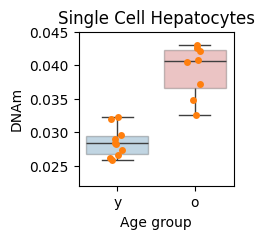

In [29]:
ms['age']=ms[0].apply(lambda x: dic[x] if x in dic.keys() else np.nan)
fig, ax = plt.subplots(figsize=(2,2));
ax=sns.boxplot(data=ms,x='age',y=1,boxprops=dict(alpha=.3),palette=['tab:blue','tab:red'])
ax=sns.stripplot(data=ms,x='age',y=1)
ax.set(ylim=[0.022,.045], ylabel='DNAm',xlabel='Age group',title='Single Cell Hepatocytes')
#add_stat_annotation(ax, data=ms, x=1, y='age',box_pairs=[(("y", "o"))],test='t-test_ind', loc='inside',verbose=0);
fig.savefig('figures/'+'single_cell'+'.png', dpi=600,bbox_inches='tight')
plt.show()    

In [38]:
pr.index='chr'+pr.index
pr.to_csv('results/mm10_scRRBS.csv',columns=[])

In [ ]:
### The following steps process RRBS mouse blood (calorie restriction) dataset GSE80672

In [ ]:
%%time
df=pd.read_csv(data+'meth/r/cr/blood.csv',engine='c',index_col=0)
age=pd.read_csv(data+'meth/r/cr/blood_age.csv',index_col=0)
print(df.shape,len(age))

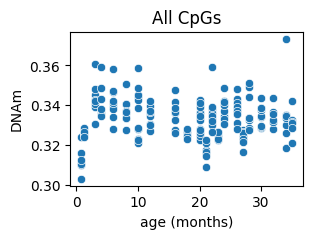

In [32]:
df=df/100
age.columns=['treatment','age (months)']
age.index=age.index.astype(str)
age=age.merge(df.mean().rename('m'),left_index=True,right_index=True)
figure='f4_rrbs_blood_CR'
pl=age[['age (months)','m','treatment']]
fig, ax = plt.subplots(figsize=(3,2));
ax=sns.scatterplot(data=pl,x='age (months)',y='m')
ax.set(ylabel='DNAm',title='All CpGs');
ax.get_figure().savefig('figures/'+figure+'.png', dpi=600,bbox_inches='tight')

In [33]:
y=age[(age['treatment']=='diet: standard')&(age['age (months)']<10)].index.tolist()
o=age[(age['treatment']=='diet: standard')&(age['age (months)']>30)].index.tolist()
m=[c for c in df.columns if c not in y and c not in o]
dg=df[df.mean(1)<.2].copy()
len(dg)

1189766

In [34]:
%%time
dg['ch']='chr'+dg.index.str.split('_').str[0]
dg['b']=dg.index.str.split('_').str[1].astype(int)
dg['ez1']=dg.apply(lambda x: mez1.stats(x['ch'],x['b'],x['b']+1)[0],axis=1)
dg=dg.dropna().copy()
pl=dg.sort_values('ez1').reset_index()[y+o].rolling(10000).mean().dropna()
len(pl)

CPU times: user 1min 49s, sys: 18.9 s, total: 2min 8s
Wall time: 2min 11s


1072152

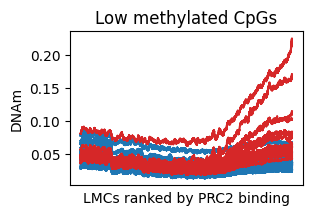

In [35]:
colors=len(y)*['tab:blue']+len(o)*['tab:red']
figure='Fig4_b_lmr'
ax=pl.plot(color=colors,figsize=(3,2))
ax.get_legend().remove()
ax.set_xticks([])
ax.set_xlabel('LMCs ranked by PRC2 binding', fontsize=10)
ax.set(ylabel='DNAm',title='Low methylated CpGs');   
ax.get_figure().savefig('figures/'+figure+'.png', dpi=600,bbox_inches='tight')
plt.show()

In [46]:
#dg.rename({'ez1':'EZH2'},axis=1)[['ch','b','EZH2']].to_csv('data/lmrs/mouse_blood_rrbs.csv')

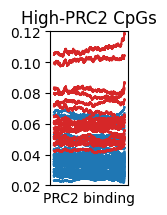

In [36]:
pl=dg.sort_values('ez1').reset_index()[y+o].tail(30000).rolling(5000).mean().dropna()
colors=len(y)*['tab:blue']+len(o)*['tab:red']
ax=pl.plot(color=colors,figsize=(1,2))
ax.get_legend().remove()
ax.set_xticks([])
ax.set_xlabel('PRC2 binding', fontsize=10)
ax.set(ylabel='',title='High-PRC2 CpGs');   
ax.set_ylim((.02,.12))
plt.show()

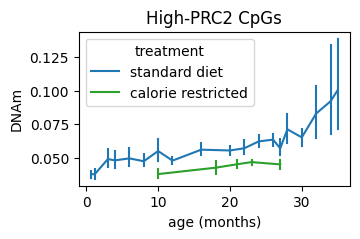

In [37]:
pl=age.merge(dg.sort_values('ez1')[df.columns].tail(1000).mean().rename('DNAm'),left_index=True,right_index=True)
pl['treatment']=pl.treatment.replace({'diet: standard':'standard diet','diet: Calorie Restricted':'calorie restricted'})
fig, ax = plt.subplots(figsize=(3.5,2))
ax=sns.lineplot(data=pl,x='age (months)',y='DNAm',hue='treatment',err_style='bars',palette=['tab:blue','tab:green'])
ax.set(title='High-PRC2 CpGs');
ax.get_figure().savefig('figures/'+'rrbs_blood_CR_prc'+'.png', dpi=600,bbox_inches='tight')